# Answer Key for HW06: hypothesis tests

**⚠️⚠️⚠️ TOTAL POINTS POSSIBLE: 26 ⚠️⚠️⚠️**

# Preliminaries

## Import needed python packages

In [1]:
from matplotlib import pyplot as plt  # for plotting
import numpy as np # for working with arrays of numerical values
import pandas as pd # for reading CSV or excel files and subsequent analyses
import scipy  # for various scientific calculations
import xarray as xr  # for loading data and subsequent analyses

## Load the Central Park data

In [2]:
!pip install pooch

# The above command installs the needed `pooch` 3rd-party package if it's not already installed.


import hashlib  # for verifying that the Central Park file is not corrupted
import pathlib  # for constructing paths to the dataset's location on disk
import sys  # for checking if this is a Google Colab session or not
import pooch  # for downloading the dataset from the web, if needed


# Replace "../data" as needed to point to the correct directory for you.
# This can be an *absolute path* or a *relative path*.  One dot, `.`, means
# "this directory", while two dots, `..`, means "go up one directory."
LOCAL_DATA_DIR = "../data"  # If you're in Colab: just ignore this.

# The URL where the dataset can be downloaded from.
DATA_URL = (
    "https://spencerahill.github.io/25f-stat-methods-course/_downloads/"
    "91803b82950d49961a65355c075439b3/central-park-station-data_1869-01-01_2023-09-30.nc"
)

# This HASH_HEX stores a "hash" which we use to verify that the data you end up
# with has not been altered or corrupted compared to the one at the above URL.
HASH_HEX = "85237a4bae1202030a36f330764fd5bd0c2c4fa484b3ae34a05db49fe7721eee"


def create_data_path(
    colab_dir="/content/data", 
    local_dir=LOCAL_DATA_DIR,
    filename="central-park-station-data_1869-01-01_2023-09-30.nc",
):
    """Set the path for the data, whether on colab or a local Jupyter session."""
    is_this_a_colab = "google.colab" in sys.modules
    if is_this_a_colab:
        data_dir = colab_dir 
    else: 
        data_dir = local_dir

    DATA_DIR = pathlib.Path(data_dir)
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    return DATA_DIR / filename


def sha256sum(path: pathlib.Path) -> str:
    """Get the hash of the file at the specified path."""
    return hashlib.sha256(path.read_bytes()).hexdigest()


DATA_PATH = create_data_path()
# Determine if we'll need to download the data, which we'll do if either (a) 
# the data can't be found, or (b) it appears corrupted/modified from the
# "master" file at the above URL.
need_fetch = (not DATA_PATH.exists()) or (sha256sum(DATA_PATH) != HASH_HEX)

# Download the data if needed.
if need_fetch:
    fetched_data = pooch.retrieve(
        url=DATA_URL, 
        known_hash=f"sha256:{HASH_HEX}",
        path=DATA_PATH.parents[0], 
        fname=DATA_PATH.name,
    )
    print(f"\nDownloaded and verified: {fetched_data}")
else:
    print(f"\nVerified existing file at {DATA_PATH}")

Looking in links: https://pypi.python.org/pypi, https://testpypi.python.org/pypi

Verified existing file at ../data/central-park-station-data_1869-01-01_2023-09-30.nc


In [3]:
import xarray as xr

# `DATA_PATH` variable was created by the hidden cell just above. 
# Un-hide that cell if you want to see the details.
ds_cp = xr.open_dataset(DATA_PATH)
ds_cp

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 56520)
Coordinates:
  * time           (time) datetime64[ns] 452kB 1869-01-01 ... 2023-09-30
Data variables:
    temp_max       (time) int64 452kB ...
    temp_min       (time) int64 452kB ...
    temp_avg       (time) float64 452kB ...
    temp_anom      (time) float64 452kB ...
    heat_deg_days  (time) int64 452kB ...
    cool_deg_days  (time) int64 452kB ...
    precip         (time) float64 452kB ...
    snow_fall      (time) float64 452kB ...
    snow_depth     (time) int64 452kB ...

## Compare the $t$ and normal distributions

In class, we learned that for hypothesis testing of differences in means, the test statistic is called Student's $t$ or just $t$.  The $t$ distribution is similar but not identical to the standard normal distribution, especially for small sample sizes.  Its exact shape depends on the *degrees of freedom*, denoted $\nu$.  For the difference in two means, this is simply $\nu=N_1+N_2-2$, where $N_1$ and $N_2$ are the sample sizes of the first and second samples, respectively.

Using [scipy.stats.t.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) and [scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm), 
plot the PDFs of both distributions spanning from -5 to 5.  For the $t$ distribution, overlay 3 different versions on the same axes: $\nu=1, 10$, and $100$.  Add a legend labeling each of these and the normal.

This demonstrates that, as the sample sizes grow, the $t$ distribution increasingly is well approximated by the standard normal.  (In fact, it holds mathematically that the $t$ distribution approaches the standard normal exactly as $\nu\rightarrow\infty$.)

### ⚠️ POINTS: 4
One for the normal and one each for the three t distributions.

### ✅ ANSWER

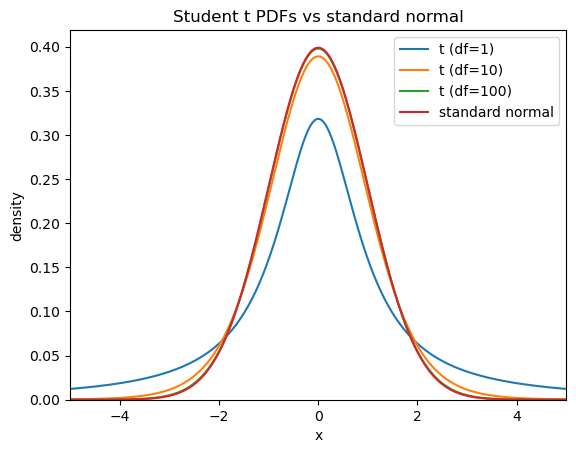

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# x-range
x = np.linspace(-5, 5, 400)

# t-distribution PDFs for different degrees of freedom
dfs = [1, 10, 100]
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f"t (df={df})")

# Standard normal PDF
plt.plot(x, norm.pdf(x), label="standard normal")

# Labels and legend
plt.xlabel("x")
plt.ylabel("density")
plt.title("Student t PDFs vs standard normal")
plt.legend()

plt.xlim(-5, 5)
plt.ylim(bottom=0)

plt.show()

## Find the most helpful online resources on $t$ tests you can find
There are tons of great resources that are available online and completely free.  These include blog posts, YouTube videos, tutorials in the documentation to statistical software packages, whole semester-length university classes that have been pre-recorded, and more.  (The course [resources](../info/resources) page lists just a few.)  An important but overlooked skill (you could call it a *meta* skill) for scientists and engineers is learning to make use of these resources.

For this assignment, search the web to find the best **two** different resources you can.  They can be any of the types listed above or something else. 

- For each resource: provide the URL to the resource and describe how you found it.
- If it's a YouTube video, embed the video in your Jupyter notebook.
- Write summaries in *your own words* of what each resource conveys.
- Describe one or more things that each resource helped you understand.
- Describe one or more things that each resource did *not* help you with, either because it was missing or was included but you're still unclear on it.
- Rank the two resources: which was more helpful and why?

:::{note}
You can use LLMs to find resources, but don't list the LLM itself as the resource you choose.
:::

### ⚠️ POINTS: 10

One each, per resource, for the link, summary, description of things it helped you understand, and description of things it didn't help you with.  Two points for the ranking and discussion.

### ✅ ANSWER

There's no single right answer here...this one was up to you!

## Write your own functions for computing the $t$ statistic and $p$ value

### ⚠️ POINTS: 4

Two each for each function

### ✅ ANSWER

In [5]:
def var_pooled(sample1, sample2):
    """Compute the pooled variance of two 1-D samples."""
    valid_sample1 = sample1[~np.isnan(sample1)]
    valid_sample2 = sample2[~np.isnan(sample2)]
    num_obs1 = len(valid_sample1)
    num_obs2 = len(valid_sample2)

    numer = ((num_obs1 - 1) * valid_sample1.var(ddof=1) + 
             (num_obs2 - 1) * valid_sample2.var(ddof=1))
    denom = num_obs1 + num_obs2 - 2
    return numer / denom
    

def t_stat(sample1, sample2):
    """Compute the t statistic for difference in means of the two samples.
    
    Arguments:

    sample1, sample2: xarray.DataArrays, each containing one of the 
                      two samples to compute the t statistic for

    """
    valid_sample1 = sample1[~np.isnan(sample1)]
    valid_sample2 = sample2[~np.isnan(sample2)]
    num_obs1 = len(valid_sample1)
    num_obs2 = len(valid_sample2)

    numer = valid_sample1.mean() - valid_sample2.mean()
    denom = var_pooled(valid_sample1, valid_sample2) ** 0.5 * np.sqrt(num_obs1 ** -1 + num_obs2 ** -1)
    return numer / denom


def pval_of_ttest(t_stat, deg_free):
    """Compute the p value of of the given t statistic and degrees of freedom.
    
    Arguments:

    t_stat: scalar, the value of the t statistic
    deg_free: scalar, the number of degrees of freedom corresponding to t_stat

    """
    # Insert your code here for computing the p value
    return 2.0 * (1.0 - scipy.stats.t.cdf(np.abs(t_stat), df=deg_free))

## Compute t tests from CP dataset

Specifically, for each of the following pairs of samples from the Central Park dataset:

1. Across all years 1869-2022, monthly average precipitation in September vs. in January.
2. Average annual sum of cooling degree days for the period 1971-2000 vs. 2001-2022.

Use [numpy.isclose](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html) to explicitly test your values against the results of `scipy.stats.ttest_ind`.

### ⚠️ POINTS: 8

Four for each pair: one for the data prep, one for computing the t values, one for computing the p values, and one for comparing your functions to scipy.

### ✅ ANSWER: September vs. January precip

In [6]:
def print_ttest_compar(sample1, sample2):
    scipy_result = scipy.stats.ttest_ind(sample1, sample2)
    my_t = t_stat(sample1, sample2)
    my_p = pval_of_ttest(my_t, scipy_result.df)
    print(f"""
t statistic: scipy={scipy_result.statistic:0.3f}, mine={my_t:0.3f}, np.allclose: {np.allclose(my_t, scipy_result.statistic)}.
p value: scipy={scipy_result.pvalue:0.3f}, mine={my_p:0.3f}, np.allclose: {np.allclose(my_p, scipy_result.pvalue)}.
    """)

In [7]:
precip_mon = ds_cp["precip"].resample(time="1M", skipna=True).mean()
precip_sep = precip_mon.where(precip_mon["time"].dt.month == 9, drop=True)
precip_jan = precip_mon.where(precip_mon["time"].dt.month == 1, drop=True)

/Users/sah2249/miniconda3/envs/25f-stats/lib/python3.13/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [8]:
print_ttest_compar(precip_sep, precip_jan)


t statistic: scipy=2.188, mine=2.188, np.allclose: True.
p value: scipy=0.029, mine=0.029, np.allclose: True.
    


### ✅ ANSWER: 1971-2000 vs. 2001-2022 cooling degree days

In [9]:
cdd_71_00 = ds_cp["cool_deg_days"].sel(time=slice("1971", "2000"))
cdd_01_22 = ds_cp["cool_deg_days"].sel(time=slice("2001", "2022"))

cdd_71_00_ann = cdd_71_00.groupby("time.year").sum()
cdd_01_22_ann = cdd_01_22.groupby("time.year").sum()

In [10]:
print_ttest_compar(cdd_71_00_ann, cdd_01_22_ann)


t statistic: scipy=-2.187, mine=-2.187, np.allclose: True.
p value: scipy=0.033, mine=0.033, np.allclose: True.
    


## Extra credit

### ⚠️ EXTRA CREDIT POINTS: For each Q, up to 5% of possible non-extra credit points
Decide for yourself what you earned, between 0% and 5%, based on what was asked for.

### Compute the $t$ test for two or more salient differences-in-mean for your final project.

Find at least two pairs of sample means from your datasets whose difference are scientifically interesting for your project.  Perform the $t$ test for each.  Report the numerical values of the $t$ statistic, $p$ value, degrees of freedom.  Describe your interpretation of the $t$ test from a statistical perspective.  Also describe your interpretaiton from a physical/scientific perspective.

#### ✅ ANSWER
This will depend on your dataset.

### Create a dedicated conda environment for this course

The [Resources](../info/resources) page explains why it's a good idea to create separate virtual environments for different projects/classes/ etc. using the Anaconda/conda environment manager.  For this extra credit opportunity, create a dedicated environment using Anaconda Navigator or the conda command line tool.  The environment must be created specifically for this purpose; you could name it `eas42000` or `eas-a4200` for example. 

To show that you have done this, include the following cell in your notebook. 

In [11]:
import os
import sys
import jupyter_core

print(f"Path to the active Python executable: {sys.executable}") 
print(f"Path to the active Jupyter installation: {jupyter_core.__file__}")
print(f"""Currently active conda environment: {os.environ.get("CONDA_DEFAULT_ENV")}""")

Path to the active Python executable: /Users/sah2249/miniconda3/envs/25f-stats/bin/python
Path to the active Jupyter installation: /Users/sah2249/miniconda3/envs/25f-stats/lib/python3.13/site-packages/jupyter_core/__init__.py
Currently active conda environment: 25f-stats


#### ✅ ANSWER

Your answer will be the output of the above code.  If it shows that the active python and jupyter are inside the directory for the environment you created, and that this environment is what's active, then you get full credit.